# CT5133 Deep Learning Assignment02
# Student Name : Akanksha
# Student ID : 20231242

In [5]:
import numpy as np
from IPython.display import Image, display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from keras import models
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#### MOUNT DRIVE TO USE AS A EXTRENAL STORAGE ####
# Notebook settings to GPU
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
# magic command %cd - to move into directories#
%cd '/content/drive/My Drive/'

/content/drive/My Drive


In [12]:
!ls '/content/drive/My Drive/'

'Colab Notebooks'	    'output (3).avi'   YOLO_MOBILENET
 friends_tv_series_dataset   YOLO	       yolov3.cfg


# 1. Labelled image classification dataset for 2 classes.
For this assignment the 2 class image dataset has been created.

**Dataset Details**: 

*Dataset is available on below github link in the same ordered folder as used in below codes. However, dataset has been used by uploading data on google drive in below implementation.*

https://github.com/anks310/friends_tv_series_dataset.git

Background : 
The dataset includes images of 2 famous character "Rachel Green" and "Monica Geller" from Netflix TV series "FRIENDS".

jmd-imagescraper has been used to download the images (dataset). This is a libraray to download the image dataset for deep learning.

Size/shape, classes: Dataset is for classification into 2 class - "Rachel Green" and "Monica Geller". After downloading the into the respective folder image has been taken into  batches of tensor image data that is in the format which is required to read by keras model with size : 224,224


**Method of collection**:

jmd-imagescraper has been used to download the images (dataset). This is a libraray to download the image dataset for deep learning.

[1]https://pypi.org/project/jmd-imagescraper/

**Divide the data in 1.train, 2.test and 3.val**

[2]https://stackoverflow.com/questions/64114607/copying-recursively-in-python3

[3]https://www.programcreek.com/python/example/89688/keras.layers.GlobalAveragePooling2D

In [ ]:
! pip install jmd-imagescraper

In [ ]:
from jmd_imagescraper.core import * # [1]

root = "friends_tv_series_dataset" # Folder on google drive to store images of 2 character or class
duckduckgo_search(root, "Rachel Green", "friends-tv series character Rachel Green", max_results=600) 

# "Rachel Green" - Folder name to store the images 
# "friends-tv series character Rachel Green" serach detials of image, "max_result" - total number of images

In [ ]:
root = "friends_tv_series_dataset" # Folder on google drive to store images of 2 character or class
duckduckgo_search(root, "Monica Geller", "friends-tv series character Monica Geller", max_results=600)

# "Monica Geller" - folder name to store the images 
# "friends-tv series character Monica Geller" serach detials of image, "max_result" - total number of images

In [ ]:
# No. of images download and stored in 2 folder inside folder name "friends_tv_series_dataset"
RG_len = len(os.listdir("friends_tv_series_dataset/Rachel Green"))
MG_len = len(os.listdir("friends_tv_series_dataset/Monica Geller"))
print(RG_len)
print(MG_len)

600
600


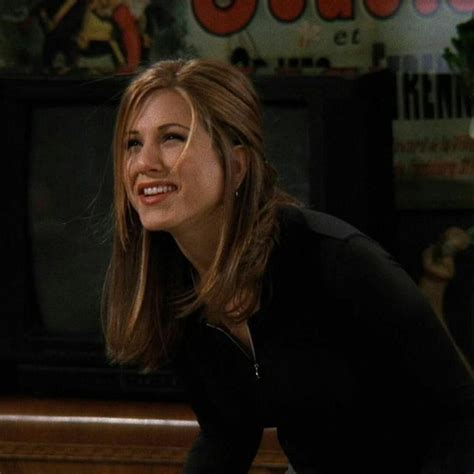

In [ ]:
class0_image =Image(filename ='friends_tv_series_dataset/Rachel Green/001_8496c78e.jpg',width=224,height=224)
class0_image

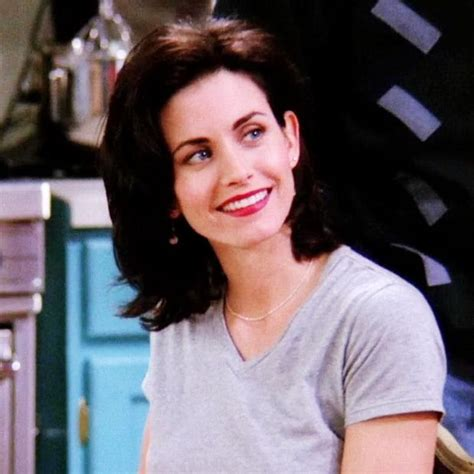

In [ ]:
class1_image =Image(filename ='friends_tv_series_dataset/Monica Geller/001_167be08f.jpg',width=224,height=224)
class1_image

**Divide the dataset into train, test and validation [2]**

In [ ]:
RG_img = os.listdir("friends_tv_series_dataset/Rachel Green")
MG_img = os.listdir("friends_tv_series_dataset/Monica Geller")

#### TRAIN - TEST_SPLIT  ####

train_RG, test_RG = train_test_split(RG_img, test_size=0.2, random_state=1)
train_MG, test_MG = train_test_split(MG_img, test_size=0.2, random_state=1)

#### TEST - VALIDATION SPLIT  ####

test_RG, val_RG = train_test_split(test_RG, test_size=0.1, random_state=1)
test_MG, val_MG = train_test_split(test_MG, test_size=0.1, random_state=1)

print(len(train_RG),len(test_RG),len(val_RG))
print(len(train_MG),len(test_MG),len(val_MG))

480 108 12
480 108 12


**Data Copy from root folder into train, test and val. [3]**



In [ ]:
# Transfer "TRAINING" images inside "train" folder --> Rachel Green (folder name is the name of the class/ labels) [2]
src_dir = "friends_tv_series_dataset/Rachel Green/" # source directory
dst_dir = "friends_tv_series_dataset/train/Rachel Green/" # destination directory
for i in train_RG:
    shutil.copy(src_dir+i, dst_dir)

In [ ]:
src_dir = "friends_tv_series_dataset/Monica Geller/"
dst_dir = "friends_tv_series_dataset/train/Monica Geller/"
for i in train_MG:
    shutil.copy(src_dir+i, dst_dir)

In [ ]:
# Transfer "TEST" images inside "test" folder
src_dir = "friends_tv_series_dataset/Rachel Green/"
dst_dir = "friends_tv_series_dataset/test/Rachel Green/"
for i in test_RG:
    shutil.copy(src_dir+i, dst_dir)

In [ ]:
src_dir = "friends_tv_series_dataset/Monica Geller/"
dst_dir = "friends_tv_series_dataset/test/Monica Geller/"
for i in test_MG:
    shutil.copy(src_dir+i, dst_dir)

In [ ]:
# Transfer "VALIDATION" images inside "val" folder
src_dir = "friends_tv_series_dataset/Rachel Green/"
dst_dir = "friends_tv_series_dataset/val/Rachel Green/"
for i in val_RG:
    shutil.copy(src_dir+i, dst_dir)

In [ ]:
src_dir = "friends_tv_series_dataset/Monica Geller/"
dst_dir = "friends_tv_series_dataset/val/Monica Geller/"
for i in val_MG:
    shutil.copy(src_dir+i, dst_dir)

# 2. Mobilenet : The pretrained image classification model choosed in this part to train on custom datset created in part 1

*   MobileNet is a class of lightweight deep convolutional neural networks that are vastly smaller in size and faster in performance than in many other popular models, and we'll see how we can work with mobile nets and code using Keras.
*   MobileNets are a class of small, low latency, low power models that can be used for classification detection and other common tasks convolutional neural networks are good for. 

*   Because of their small size, these are considered great deep learning models to be used on mobile devices to give a quick comparison in regards to size. 
*   The size of one of the currently largest mobile nets is about 17 megabytes.Its huge difference, especially when you think about deploying a model to a mobile app or running it in the browser.
*   This batch size difference is due to the number of parameters within these networks MobileNet has 17 megabyte parameters, the size of the networks in memory is also proportional to the number of parameters. 
*   Mobile nets typically aren't as accurate as other large resource heavy models, but they perform it well with only a relatively small reduction in accuracy.

Steps outlines to create MobileNet model on custom dataset

1.   Import the MobileNet model. Add Global pooling and Softmax for 2 class classification and then train on custom dataset created in Part 1
2.   Define the path to the images.
3.   Call the keras function ImageDataGenerator, which accepts the images stored in the corresponding path, and the target size for the image we're setting to 224 by 224, that's the default size for mobilenet.
4.   Train the model with training and valdation batches
5.   Test on Test batches and calulate the accuracy using "model.evaluate".
6.   Check the prediction on unseen random input image.
7.   To test on any random image convert the image into an array with Keras image to array function. And then we expand the dimensions of the array by using NumPy, expand dense. 

[4]https://deeplizard.com/learn/video/pZoy_j3YsQg

[5]https://keras.io/api/applications/mobilenet/

[6]https://keras.io/api/applications/

[7]https://www.tutorialspoint.com/keras/keras_model_evaluation_and_prediction.htm


In [13]:
train_path = "friends_tv_series_dataset/train"
test_path = "friends_tv_series_dataset/test"
val_path = "friends_tv_series_dataset/val"

In [14]:
#ImageDataGenerator generates batches of tensor image data = this is formate which is required to read by keras model [4]
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size =(224,224),classes =['Rachel Green','Monica Geller'], batch_size =10)
valid_batches = ImageDataGenerator().flow_from_directory(val_path,target_size =(224,224),classes =['Rachel Green','Monica Geller'], batch_size =10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size =(224,224),classes =['Rachel Green','Monica Geller'], batch_size =10, shuffle = False)

Found 960 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [7]:
print(train_batches.class_indices)
print(test_batches.class_indices)
print(valid_batches.class_indices)

{'Rachel Green': 0, 'Monica Geller': 1}
{'Rachel Green': 0, 'Monica Geller': 1}
{'Rachel Green': 0, 'Monica Geller': 1}


In [35]:
# From Keras Applications MobileNet model has been selected [5] 
base_model = tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False, ##### excluding the dense classification head.####
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)
base_model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________

We have not ("include_top=False") included the top layers that is not including the last 6 layers everything else is included.
Mobilenet is functional model i.e functional api from keras so it calls all previous layer by (x) hence we can pass all the previous layer stored in x to output.


In [ ]:
# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Add a fully-connected layer
output = Dense(units=2, activation ="softmax")(x) # prediction= output
classify_model = Model(inputs=base_model.input,outputs=output) # mobile.input taking input from original mobile net model
classify_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0   

**Train the "classify_model"**

Freezing some layer by experimenting we found that freezing all layers except last 23 layers will give reasonable result.
Training 23 layers : Training will be done on last 23 layer only rest is non trainable

In [ ]:
# freeze some layer :  experiment we found that freezing all layers except last 23 layers this will give reasonable result
# Training 23 layers : Training will be done on last 23 layer only rest is non trainable
for layer in classify_model.layers[:-23]:
    layer.trainable = False

In [ ]:
# Train the MODEL
classify_model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy', metrics =["accuracy"])
classify_model.fit(x=train_batches, validation_data = valid_batches, epochs=30,verbose=2) #x : training data, validation data

Epoch 1/30
96/96 - 6s - loss: 0.6624 - accuracy: 0.6667 - val_loss: 0.9218 - val_accuracy: 0.5833
Epoch 2/30
96/96 - 5s - loss: 0.3399 - accuracy: 0.8667 - val_loss: 0.6421 - val_accuracy: 0.6250
Epoch 3/30
96/96 - 4s - loss: 0.2334 - accuracy: 0.9260 - val_loss: 0.6905 - val_accuracy: 0.6667
Epoch 4/30
96/96 - 4s - loss: 0.2035 - accuracy: 0.9427 - val_loss: 0.8852 - val_accuracy: 0.5833
Epoch 5/30
96/96 - 4s - loss: 0.2036 - accuracy: 0.9375 - val_loss: 2.0694 - val_accuracy: 0.5833
Epoch 6/30
96/96 - 4s - loss: 0.1706 - accuracy: 0.9427 - val_loss: 0.6488 - val_accuracy: 0.6667
Epoch 7/30
96/96 - 4s - loss: 0.1623 - accuracy: 0.9500 - val_loss: 0.7687 - val_accuracy: 0.6250
Epoch 8/30
96/96 - 4s - loss: 0.1720 - accuracy: 0.9396 - val_loss: 1.6593 - val_accuracy: 0.5833
Epoch 9/30
96/96 - 5s - loss: 0.1604 - accuracy: 0.9531 - val_loss: 0.9940 - val_accuracy: 0.6250
Epoch 10/30
96/96 - 4s - loss: 0.1457 - accuracy: 0.9563 - val_loss: 1.8595 - val_accuracy: 0.5417
Epoch 11/30
96/96 -

EVALUTE THE MODEL

In [29]:
# print actual test labels for visualisation
test_actual_labels = test_batches.classes
test_actual_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
# class labels and indices
class_dict = test_batches.class_indices
class_dict

{'Monica Geller': 1, 'Rachel Green': 0}

In [12]:
test_predict = []
predictions = classify_model.predict(x=test_batches,verbose =0)
# convert max probabilistic value of prediction into corresponding class
for i in predictions:
  test_predict.append(list(class_dict.values()).index(np.argmax(i)))

In [30]:
# print predicted test labels for visualisation
print(test_predict)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]



**Evaluate classify_model on test and train data [6]**









In [48]:
classify_model.metrics_names

['loss', 'accuracy']

In [19]:
x_train , train_labels = next(train_batches) # every time it will take another batch of images and labels
score = classify_model.evaluate(x_train, train_labels, verbose = 0) 
print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

Train loss: 0.00540449284017086
Train accuracy: 1.0


In [46]:
x_test , test_labels = next(test_batches) # every time it will take another batch of images and labels
score = classify_model.evaluate(x_test, test_labels, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.8001713752746582
Test accuracy: 0.800000011920929


**SAVE THE MODEL**

In [ ]:
import os.path
if os.path.isfile('friends_tv_series_dataset/MODEL/friends_model.h5') is False:
    classify_model.save('friends_tv_series_dataset/MODEL/friends_model.h5')

**LOAD THE MODEL**

In [16]:
model = load_model('friends_tv_series_dataset/MODEL/friends_model.h5')

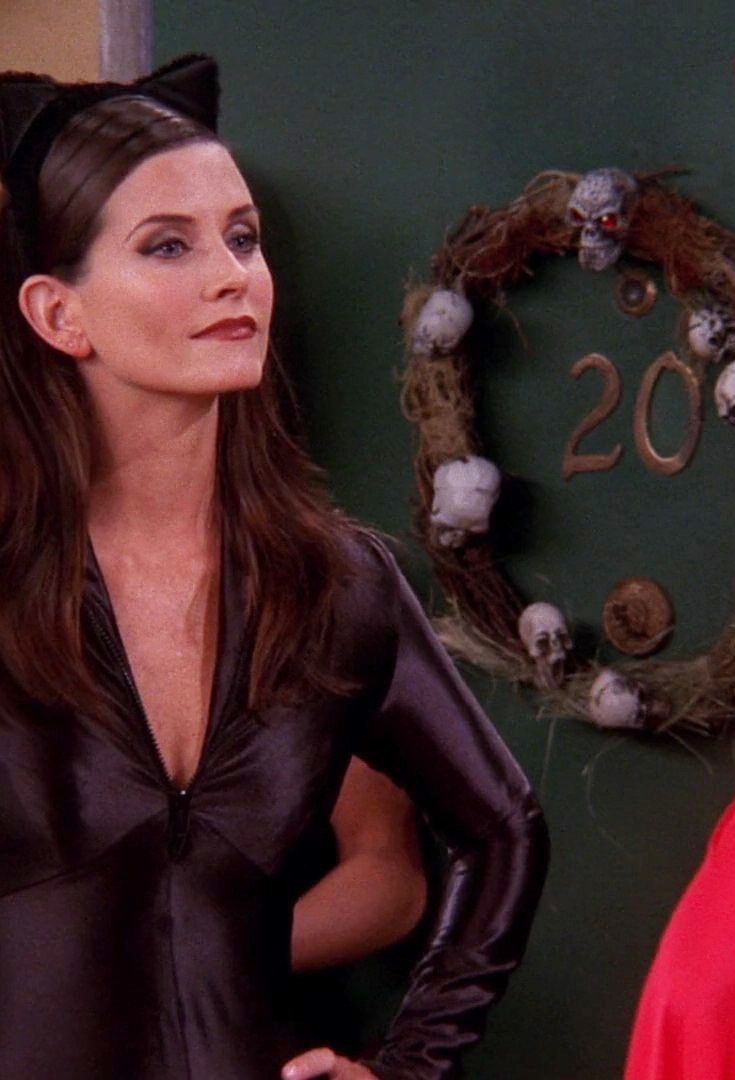

In [19]:
img =Image(filename ='friends_tv_series_dataset/Classify/MG1.jpg',width=224,height=224)
img

**Predict the unseen input image by passing into the trained model on custom dataset**

In [53]:
#Preprocesses the image to get it in the format that the model expects, we'll be passing each of our images to this function before we use mobilenet to predict on them.
# image processing function MobilNet]
#Refrence : [6]https://keras.io/api/applications/
def image_processing(img):
  img = image.load_img(file,target_size=(224,224))
  img_arr = image.img_to_array(img)
  img_arr_dim_expand = np.expand_dims(img_arr,axis=0)
  processed_img = tf.keras.applications.mobilenet.preprocess_input(img_arr_dim_expand)
  return processed_img

[[0.00957673 0.9904233 ]]
Monica Geller


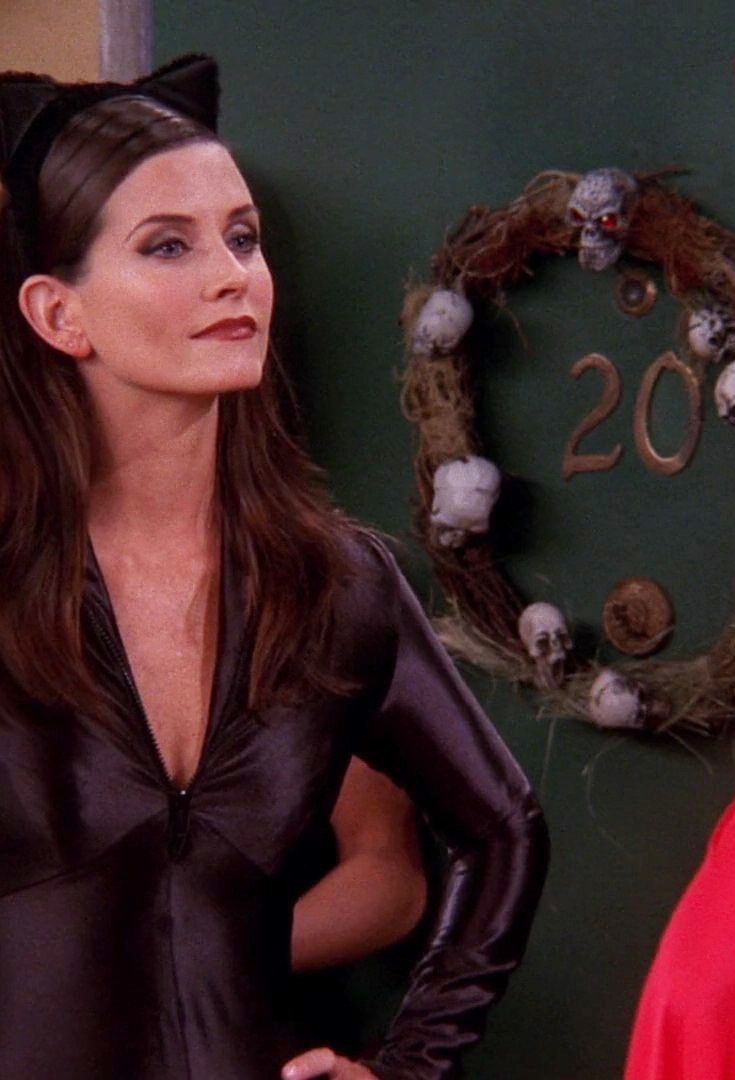

In [26]:
file ='friends_tv_series_dataset/Classify/MG1.jpg'
MG1 =Image(filename ='friends_tv_series_dataset/Classify/MG1.jpg',width=224,height=224)
image = image_processing(file)
predict = model.predict(image) # in "model" we have classification model with softmax
max_prob_predict = np.argmax(predict)
print(predict)
print(list(class_dict.keys())[list(class_dict.values()).index(max_prob_predict)])
MG1

[[0.9495249  0.05047512]]
Rachel Green


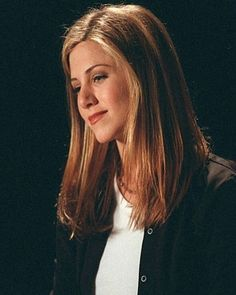

In [23]:
file ='friends_tv_series_dataset/Classify/RG1.jpg'
RG1 =Image(filename ='friends_tv_series_dataset/Classify/RG1.jpg',width=224,height=224)
image = image_processing(file)
predict = model.predict(image)
print(predict)
print(list(class_dict.keys())[list(class_dict.values()).index(np.argmax(predict))])
RG1

[[0.68912315 0.31087682]]
Rachel Green


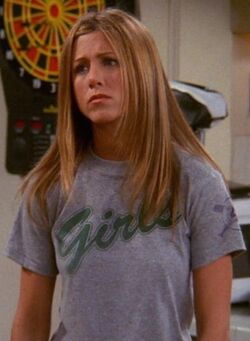

In [28]:
file ='friends_tv_series_dataset/Classify/RG4.jpg'
RG2 =Image(filename ='friends_tv_series_dataset/Classify/RG4.jpg',width=224,height=224)
image = image_processing(file)
predict = model.predict(image)
print(predict)
print(list(class_dict.keys())[list(class_dict.values()).index(np.argmax(predict))])
RG2

[[0.03625439 0.96374565]]
Monica Geller


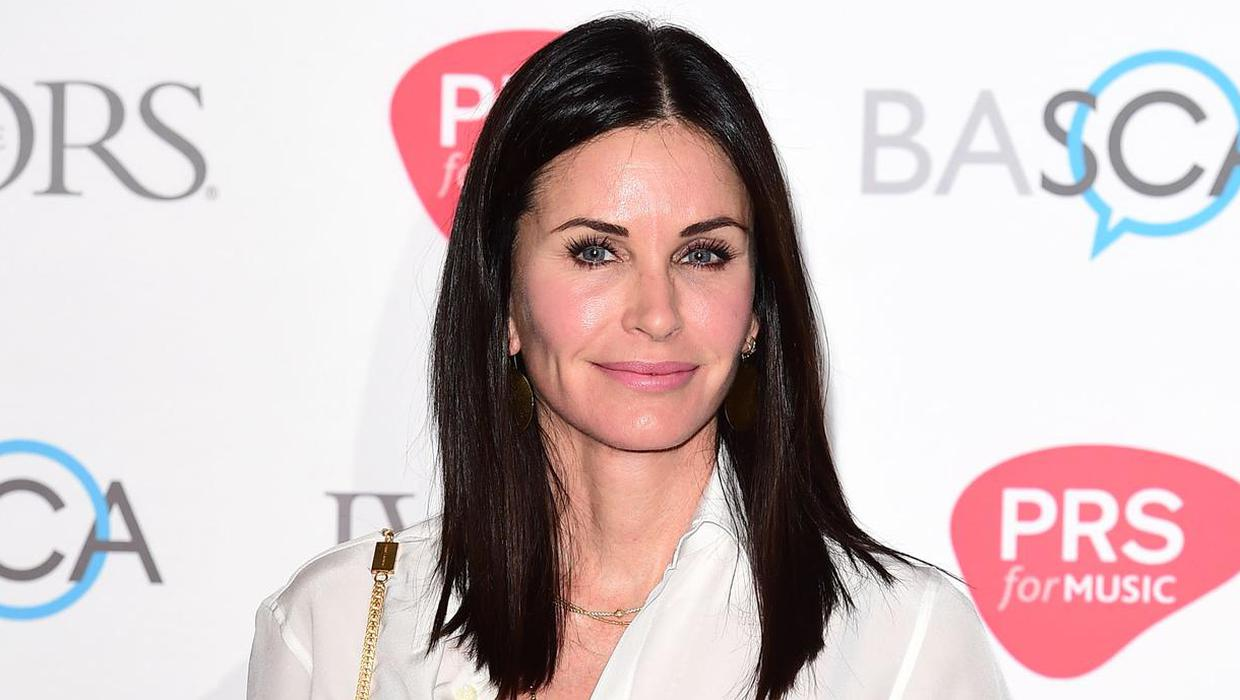

In [30]:
file ='friends_tv_series_dataset/Classify/MG2.jpg'
MG2 =Image(filename ='friends_tv_series_dataset/Classify/MG2.jpg',width=224,height=224)
image = image_processing(file)
predict = model.predict(image)
print(predict)
print(list(class_dict.keys())[list(class_dict.values()).index(np.argmax(predict))])
MG2

# PART 3 : Base Model Investigation

In this part "global average pooling layer" and "softmax" has been added to the Base model.

Base Model has last layer : global_average_pooling2d (Gl (None, 1024) 0   



In [36]:
# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Add a fully-connected layer
output = keras.layers.Softmax()(x) # prediction= output
base_model_part3 = Model(inputs=base_model.input,outputs=output) # mobile.input taking input from original mobile net model
base_model_part3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0     

In [38]:
if os.path.isfile('friends_tv_series_dataset/MODEL/base_model_part3.h5') is False:
    base_model_part3.save('friends_tv_series_dataset/MODEL/base_model_part3.h5')

In [51]:
#### TO LOAD THE MODEL
base_model_part3 = load_model('friends_tv_series_dataset/MODEL/base_model_part3.h5')

Shape of the Image: (1, 224, 224, 3)
Shape of the Scalar output from each neuron in the final layer:  (1, 1024)


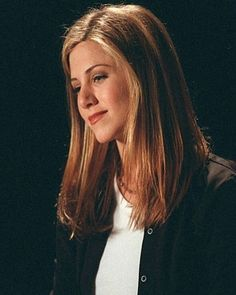

In [60]:
## TO CHECK THE SIZE AND SHAPE OF IMAGE  

file ='friends_tv_series_dataset/Classify/RG1.jpg'
RG1 =Image(filename ='friends_tv_series_dataset/Classify/RG1.jpg',width=224,height=224)
processed_img = image_processing(RG1)
intermediate_output = base_model_part3.predict(processed_img)
print("Shape of the Image:",processed_img.shape)
print("Shape of the Scalar output from each neuron in the final layer: ",intermediate_output.shape)
RG1

**Here, we will take random 10 images from train_batches and pass it non-tranied base_model (base_model_part3) and will take the index of the top 10 values(index correspondes to the neuron) after calculating the correlation.**

In [468]:
# every time it will take another batch of images and labels 
x_img , y_label = next(train_batches) 
y_label # [1,1,0,1,0,0,0,1,0,1]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

[0. 1.]


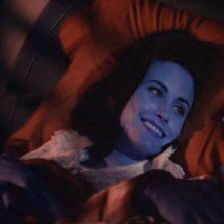

[0. 1.]


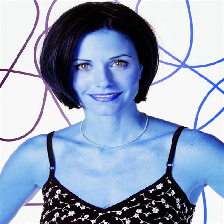

[1. 0.]


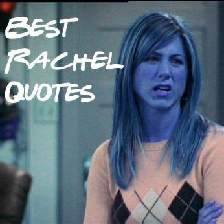

[0. 1.]


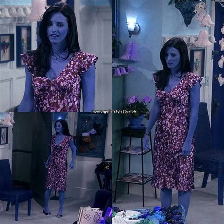

[1. 0.]


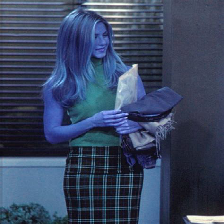

[1. 0.]


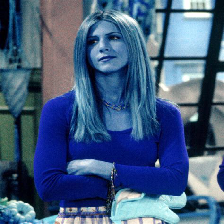

[1. 0.]


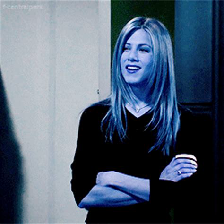

[0. 1.]


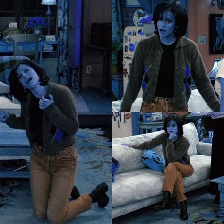

[1. 0.]


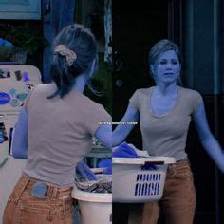

[0. 1.]


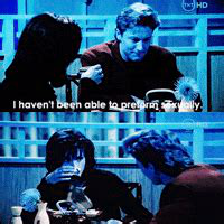

In [522]:
#display image and class images based on trained model and we can use the predicted class as y_true while performing prediction in base model
for count,i in enumerate(x_img):
  processed_img = image_processing(i)
  intermediate_output = classify_model.predict(processed_img) 
  print(y_label[count])
  cv2_imshow(i)

In [472]:
y_true = [1,1,0,1,0,0,0,1,0,1] # Class calculated in part2 {'Monica Geller': 1, 'Rachel Green': 0} 

In [473]:
# pass the above selected 10 images into the mobileNet base model which is not trained on the custom dataset
import pandas as pd
y_pred = base_model_part3.predict(x_img, steps=1, verbose=0)
df = pd.DataFrame(y_pred)
df["label"] = y_true

In [474]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.000262,0.000405,0.000262,0.000340,0.000316,0.000262,0.000263,0.000951,0.000262,0.000292,0.000290,0.000836,0.001639,0.000262,0.000262,0.000268,0.000312,0.001878,0.000310,0.000262,0.001204,0.000262,0.000274,0.000355,0.000262,0.000262,0.000262,0.000262,0.000441,0.000262,0.000262,0.000262,0.000262,0.000384,0.003495,0.000268,0.000264,0.000292,0.000262,0.000518,...,0.000313,0.000300,0.000265,0.000262,0.000287,0.000431,0.000268,0.000361,0.000262,0.000288,0.000262,0.000280,0.000322,0.000262,0.000262,0.000262,0.000333,0.000664,0.000262,0.000318,0.000269,0.000283,0.000284,0.000604,0.000268,0.000262,0.010075,0.001225,0.000328,0.000262,0.000316,0.000262,0.000267,0.000262,0.000725,0.005993,0.000461,0.000274,0.000262,1
1,0.000302,0.000337,0.000302,0.000302,0.000316,0.001157,0.000737,0.000413,0.000302,0.000537,0.000316,0.001352,0.000779,0.000302,0.000302,0.000302,0.001073,0.001081,0.000358,0.000302,0.000353,0.000302,0.000609,0.000322,0.000354,0.000302,0.000606,0.000302,0.000373,0.000302,0.000509,0.000383,0.000302,0.000349,0.000809,0.000386,0.000304,0.000351,0.002041,0.000337,...,0.000331,0.000373,0.000481,0.000302,0.000306,0.000389,0.000342,0.000621,0.000304,0.000357,0.000302,0.002001,0.000340,0.002736,0.000302,0.000302,0.002824,0.000509,0.000346,0.000349,0.000421,0.000605,0.000312,0.002491,0.000302,0.000302,0.002752,0.005702,0.000326,0.000538,0.000694,0.000308,0.000353,0.000302,0.000309,0.002001,0.001270,0.000306,0.000785,1
2,0.000296,0.000542,0.000302,0.000296,0.000296,0.000305,0.000539,0.000863,0.000296,0.000382,0.000296,0.007014,0.001015,0.000296,0.000296,0.000314,0.000366,0.003836,0.000315,0.000296,0.000730,0.000307,0.000595,0.000299,0.000296,0.000296,0.000296,0.000296,0.000428,0.000296,0.000296,0.000311,0.000296,0.000565,0.011162,0.000317,0.000369,0.000313,0.000301,0.000375,...,0.000474,0.000320,0.000329,0.000296,0.000312,0.002238,0.000296,0.000422,0.000296,0.000385,0.000296,0.000522,0.000303,0.000296,0.000296,0.000296,0.000327,0.000538,0.000296,0.000296,0.000296,0.000296,0.000373,0.000308,0.000332,0.000296,0.005381,0.000420,0.000296,0.000296,0.000407,0.000296,0.000407,0.000296,0.000665,0.007199,0.000899,0.000296,0.000296,0
3,0.000191,0.000256,0.000193,0.000191,0.000191,0.000191,0.000191,0.000286,0.000191,0.000434,0.000191,0.000347,0.000346,0.000191,0.000191,0.000191,0.000197,0.000419,0.000191,0.000191,0.000802,0.000191,0.000204,0.000349,0.000191,0.000191,0.000191,0.000191,0.000961,0.000191,0.000201,0.000296,0.000191,0.000200,0.009921,0.000197,0.000192,0.000278,0.000191,0.000274,...,0.000194,0.000191,0.000192,0.000191,0.000191,0.001277,0.000191,0.000410,0.000224,0.000191,0.000192,0.000231,0.000208,0.000191,0.000191,0.000191,0.000426,0.000258,0.000191,0.000231,0.000191,0.000192,0.000191,0.000306,0.000256,0.000191,0.000367,0.000384,0.000191,0.000191,0.000358,0.000191,0.000307,0.000191,0.000244,0.063177,0.000416,0.000191,0.000191,1
4,0.000334,0.000301,0.000327,0.000845,0.000280,0.000277,0.000310,0.000802,0.000285,0.000363,0.000277,0.002763,0.000896,0.000277,0.000277,0.000285,0.000317,0.003346,0.000283,0.000277,0.000620,0.000315,0.000296,0.000321,0.000277,0.000277,0.000281,0.000277,0.000460,0.000277,0.000303,0.000277,0.000277,0.000596,0.004740,0.000328,0.000277,0.000302,0.000283,0.000467,...,0.000278,0.000343,0.000468,0.000277,0.000277,0.005202,0.000328,0.000410,0.000278,0.000286,0.000277,0.000277,0.000314,0.000317,0.000277,0.000277,0.000279,0.000277,0.000282,0.000277,0.000279,0.000277,0.000277,0.000554,0.000524,0.000277,0.002436,0.000933,0.000281,0.000277,0.001708,0.000277,0.001267,0.000277,0.002577,0.003755,0.000578,0.000347,0.000300,0
5,0.000247,0.000370,0.000247,0.000292,0.000247,0.000247,0.000264,0.000385,0.000248,0.001100,0.000247,0.0

In [479]:
# calculate the pearson_correlation [8]
pearson_correlation = df.corr(method="pearson")
pearson_correlation

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,1.000000,0.122598,0.885336,0.172286,0.986479,0.034916,0.486672,0.878499,0.493449,0.344381,0.710794,-0.053778,-0.155831,0.697497,0.857612,0.801378,0.165374,0.969627,0.180276,0.987611,-0.145680,0.474297,0.230222,0.439057,0.947993,0.612454,0.144147,0.499057,0.382213,0.707047,0.250966,0.090631,0.988428,0.463838,0.267883,0.452166,0.353411,0.333221,-0.001985,0.968991,...,0.100611,0.093600,0.434254,0.499057,0.978691,-0.037035,0.993492,0.950645,0.795480,0.114798,0.790842,0.180637,0.573472,-0.012718,0.639770,0.499057,0.032298,-0.082395,0.975270,0.133176,0.448562,0.766248,0.331865,0.892117,0.814852,0.612194,-0.240866,-0.045004,0.362390,0.965484,0.894418,0.988363,0.032787,0.842941,0.410010,-0.433837,0.394424,0.720719,0.156508,-0.460668
1,0.122598,1.000000,0.095007,-0.155296,0.039814,-0.090079,0.107143,0.311106,0.300319,0.091771,0.226032,0.124276,0.490070,0.302139,0.249630,0.411500,0.430648,0.125307,0.672118,0.036870,0.507597,0.640141,0.033482,-0.530153,0.096190,0.295662,-0.021406,0.312891,-0.065731,0.274679,-0.005304,0.701706,0.036031,-0.028405,-0.137564,0.642654,0.477214,0.087680,-0.120116,0.023224,...,0.324893,0.251957,0.147775,0.312891,0.018459,0.017077,0.032416,0.191132,0.208009,0.459984,0.574775,0.079122,0.099277,-0.139602,0.290312,0.312891,-0.156444,0.893872,0.008487,0.562208,0.098597,-0.022757,0.289612,-0.064545,-0.045890,0.291090,-0.052406,-0.167122,0.208818,0.016586,-0.172757,0.089527,-0.213309,0.226932,-0.048952,-0.492597,-0.070400,0.199374,-0.037847,-0.404672
2,0.885336,0.095007,1.000000,0.466460,0.849245,0.241832,0.678432,0.692901,0.798257,0.243436,0.894942,0.238979,0.010947,0.834769,0.955649,0.820505,0.235355,0.771529,0.357897,0.832242,-0.259666,0.708285,0.497422,0.356116,0.931480,0.861541,0.392072,0.793161,0.204908,0.910211,0.517734,0.041577,0.848500,0.756837,-0.007964,0.357813,0.635481,0.577594,0.190353,0.763253,...,0.383539,0.367369,0.713085,0.793161,0.795955,0.224147,0.889722,0.708098,0.923665,0.397606,0.843117,0.317525,0.495898,0.179836,0.876494,0.793161,0.190742,-0.141475,0.787843,0.158634,0.690204,0.799754,0.645846,0.802477,0.808892,0.852925,-0.057221,0.167667,0.650897,0.836556,0.832016,0.904845,0.326718,0.958916,0.374194,-0.690496,0.483059,0.941308,0.382059,-0.512345
3,0.172286,-0.155296,0.466460,1.000000,0.081174,-0.000291,0.043615,0.047113,0.449671,-0.130931,0.321636,0.244843,0.063982,0.240705,0.278052,0.137209,-0.185815,0.047337,0.077094,0.064971,-0.289256,0.448754,0.034731,0.131447,0.156354,0.381579,0.102281,0.400970,-0.073050,0.357132,0.218182,-0.168590,0.076122,0.718725,-0.355450,-0.113316,0.244263,0.331275,-0.027229,0.016434,...,0.073040,0.273377,0.536022,0.400970,0.033272,0.709173,0.159209,-0.048687,0.306330,0.093571,0.213362,-0.101396,-0.002001,-0.022366,0.375407,0.400970,-0.066953,-0.198642,0.025480,-0.115831,0.219824,0.072205,0.264163,0.026486,0.488885,0.365975,0.083888,0.039931,0.350328,0.029716,0.453261,0.132901,0.963751,0.300402,0.288641,-0.400204,0.013996,0.636172,0.070657,-0.399788
4,0.986479,0.039814,0.849245,0.081174,1.000000,0.040446,0.478796,0.860755,0.447742,0.341397,0.699613,-0.095625,-0.153905,0.677769,0.835577,0.774900,0.135730,0.962300,0.119297,0.996373,-0.157947,0.376877,0.229509,0.513521,0.946114,0.576643,0.140168,0.458995,0.405733,0.675782,0.235601,0.038918,0.996627,0.410186,0.298350,0.401250,0.302011,0.313568,0.006831,0.982071,...,0.098021,0.069100,0.371081,0.458995,0.991512,-0.124828,0.992733,0.944107,0.772197,0.079213,0.729750,0.195645,0.571340,-0.003058,0.605165,0.458995,0.049588,-0.157513,0.988611,0.093294,0.436350,0.778286,0.310980,0.912857,0.770067,0.578354,-0.177085,-0.028876,0.364973,0.978963,0.861746,0.989032,-0.068288,0.820838,0.384271,-0.379256,0.405061,0.657993,0.156241,-0.355219

In [483]:
corr = pearson_correlation.iloc[-1,:] # to get last row that is label which contains correlation of all neurons from 0 to 1023
corr

0       -0.460668
1       -0.404672
2       -0.512345
3       -0.399788
4       -0.355219
           ...   
1020     0.422379
1021    -0.373715
1022    -0.536853
1023     0.206584
label    1.000000
Name: label, Length: 1025, dtype: float64

In [519]:
sorted_corr = corr.sort_values(ascending =False)[:10] # take top 10 correlated neuron
sorted_corr

label    1.000000
191      0.738882
727      0.683413
932      0.660277
571      0.595580
293      0.497026
224      0.488686
747      0.482603
490      0.474228
858      0.470983
Name: label, dtype: float64

In [520]:
sorted_corr = sorted_corr.index # fetch neuron or index numbers 
indices = sorted_corr.tolist()
indices

['label', 191, 727, 932, 571, 293, 224, 747, 490, 858]

In [521]:
del indices[0] # delete the first element from indices
print("Upmost 10 correlated neurons:",indices)

Upmost 10 correlated neurons: [191, 727, 932, 571, 293, 224, 747, 490, 858]


**Method, Results & Interpretation of the results.**

"global average pooling layer" and "softmax" has been added to the Base model. 
Pearson correlation has been used to find out the correlation of label with neurons in the network.
The index of the top 10 values(index corresponds to the neuron) has been taken for all the images given in input. So we can say that `[191, 727, 932, 571, 293, 224, 747, 490, 858]`  particular neurons contributing more or correlated in the classification with the class label of the dataset.

[8]https://www.geeksforgeeks.org/python-pandas-dataframe-corr/#:~:text=corr()%20is%20used%20to,the%20dataframe%20it%20is%20ignored

# PART 4 : Object localisation to decide where in the input image an object is present and 2D Visualisation of the neuron output

---


[9]https://towardsdatascience.com/convolutional-neural-network-17fb77e76c05

[10]https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2


[11]https://stackoverflow.com/questions/62396742/vgg16-feature-visualization

[12]https://stackoverflow.com/questions/62396742/vgg16-feature-visualization

[13]https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb

**Display Single Image with axis**

In [553]:
file ='friends_tv_series_dataset/Classify/RG1.jpg'
img = image.load_img(file,target_size=(224,224))
img_arr = image.img_to_array(img)
sample_image = np.expand_dims(img_arr,axis=0)
sample_image /= 255.
print(sample_image.shape)

(1, 224, 224, 3)


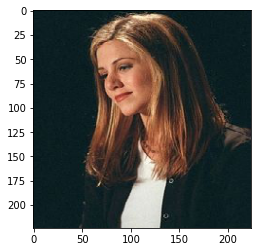

In [555]:
plt.imshow(sample_image[0])
plt.show()

In [556]:
print(len(base_model_part3.layers))
layer_list = [layer.name for layer in model.layers[81:88]]
print(layer_list) # last 7 layers of the model

88
['conv_dw_13_bn', 'conv_dw_13_relu', 'conv_pw_13', 'conv_pw_13_bn', 'conv_pw_13_relu', 'global_average_pooling2d', 'softmax']


In [557]:
# Extracts the outputs of the top 7 layers except softmax_1 or we can take 'conv_pw_13_relu'to visvualise the output of each neuron :
from keras import models
model = base_model_part3
layer_outputs = [layer.output for layer in model.layers[81:87]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # model that will return these outputs, given the model input:
activations = activation_model.predict(sample_image) 

In [558]:
layer_list = [layer.name for layer in activation_model.layers[81:87]] # create layer list of the last 7 layer
print(layer_list)
layer_list[4] 

['conv_dw_13_bn', 'conv_dw_13_relu', 'conv_pw_13', 'conv_pw_13_bn', 'conv_pw_13_relu', 'global_average_pooling2d']


'conv_pw_13_relu'

In [559]:
layer_activation = activations[4] # Output of layer "conv_pw_13_relu". Here, 4 is the index of "conv_pw_13_relu" layer
print(layer_activation.shape)

(1, 7, 7, 1024)


191


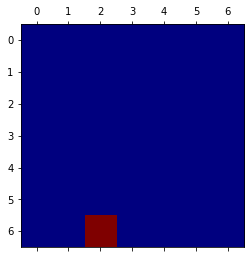

727


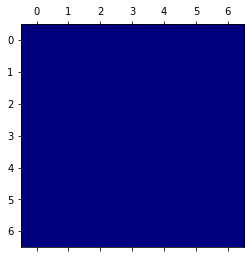

932


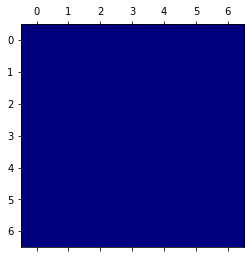

571


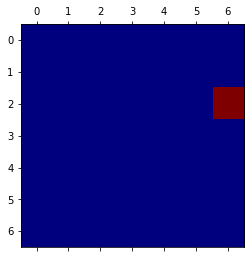

293


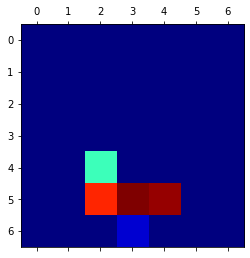

224


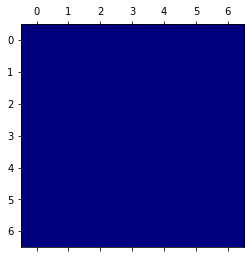

747


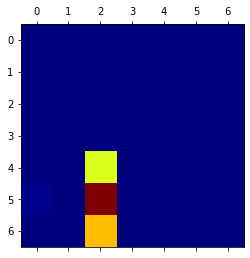

490


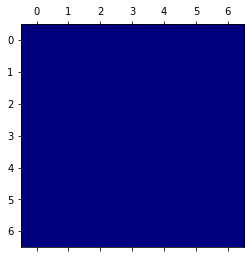

858


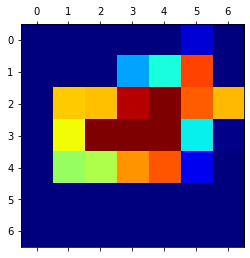

In [560]:
for i in indices: # display neurons in "indices" of the layer "conv_pw_13_relu": "indices" is found out in part3 for 10 max. values neuron
  print(i)
  plt.matshow(layer_activation[0, :, :, i], cmap='jet') 
  plt.show()

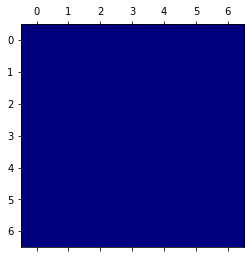

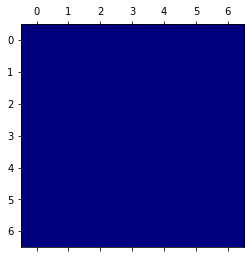

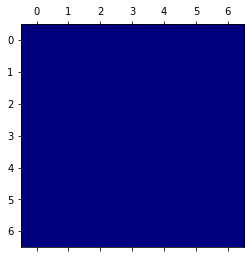

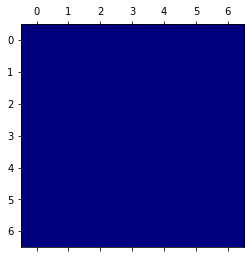

In [561]:
random_neuron = [1,20,300,700] # visualise the output of random neurons
for i in random_neuron:
  plt.matshow(layer_activation[0, :, :, i], cmap='jet')
  plt.show()

In [547]:
indices[0:2]

[191, 727]

**Visualisation for the several images**

191


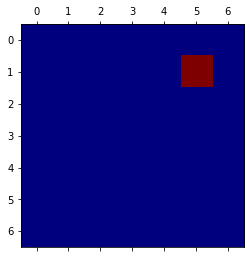

727


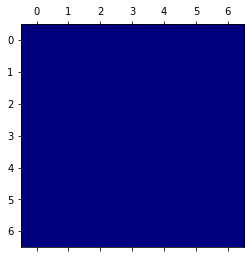

191


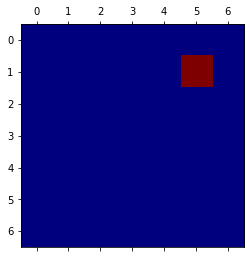

727


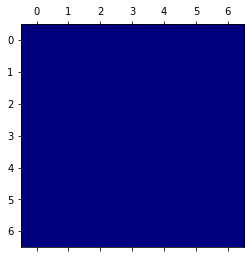

191


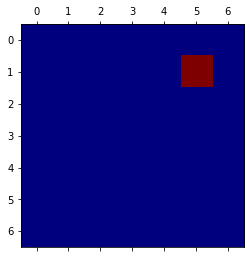

727


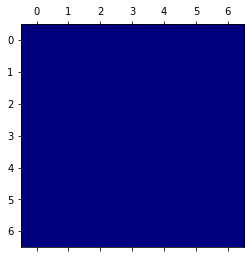

191


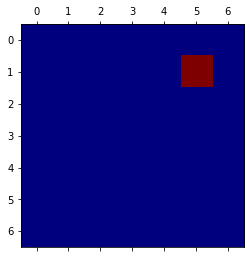

727


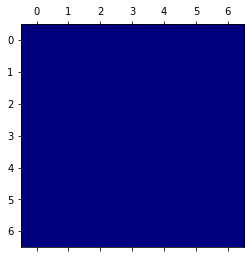

191


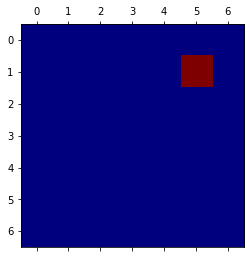

727


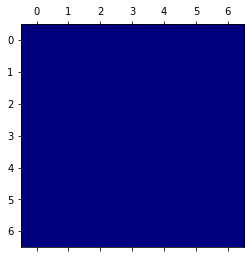

191


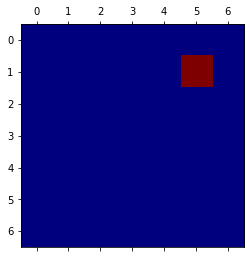

727


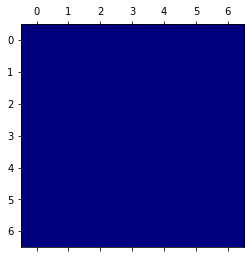

191


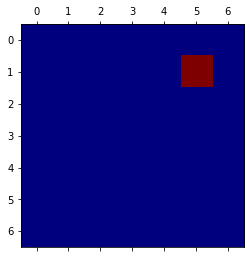

727


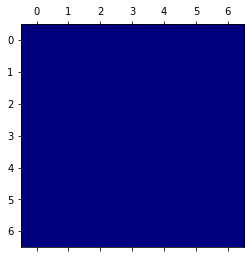

191


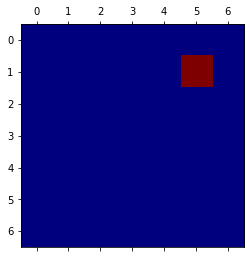

727


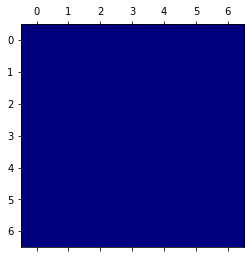

191


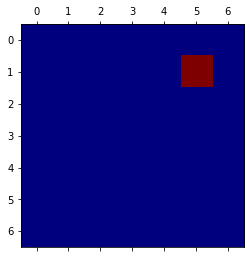

727


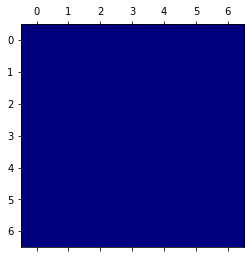

191


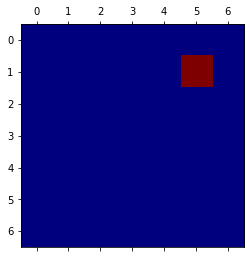

727


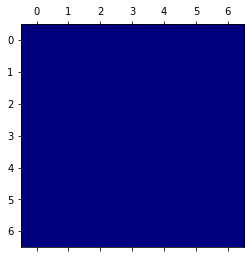

In [548]:
for img in x_img:
  img_arr = image.img_to_array(img)
  img_arr_dim_expand = np.expand_dims(img_arr,axis=0)
  img_arr_dim_expand /= 255.
  activations = activation_model.predict(img_arr_dim_expand) 
  layer_activation = activations[4]
  for i in indices[0:2]: # display top 2 correlated neurons found in part 3 "[191, 727]" in "indices" for all the images used to find out the correlation
    print(i)
    plt.matshow(layer_activation[0, :, :, i], cmap='jet') 
    plt.show()

**Interpretation:**

From the output of the Neuron (Index) existing in the indices we can say there are small patterns or spot of colour exist in the 2D output plot.
However when we select random neuron with low values there is no pattern or just 1 or 2 spot of colour found. So we can say the Neuron `[191, 727, 932, 571, 293, 224, 747, 490, 858] `correlated more eventhough it is difficult to recognise the exact image or the features of image which is considered by a particular neuron as it is not in human readable form 

## More End Layer Neuron output visualisation for analysis

[14]https://www.codeastar.com/visualize-convolutional-neural-network/

In [1]:
# function to pass the layer number needs to be visualise  [14]
def visualise_2D_output(activations, col_size, row_size, act_index): 
    layer_activation = activations[act_index] # taking "act_index" layer of model
    activation_index=0 # layer neuron initialisation from 0 
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5)) # dividing the plot into subplots
    for row in range(0,row_size): 
        for col in range(0,col_size): 
            ax[row][col].imshow(layer_activation[0, :, :, activation_index], cmap='jet') # activation_index is the layer no and [row][col] is to divide the main plot into different area to display image at different position in the plot like 00,01,10,11 position of the plot to view different neuron output 
            activation_index += 1 # updating neuron 0 to 1 to 2 to 3 to get output of each neuron

In [111]:
layer_outputs

[<KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'conv_dw_13_bn')>,
 <KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'conv_dw_13_relu')>,
 <KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'conv_pw_13')>,
 <KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'conv_pw_13_bn')>,
 <KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'conv_pw_13_relu')>,
 <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_average_pooling2d')>]

As for visualisation we selected last 6 layer in the activation_model so no of layer can be 0 to 5. 

Neurons = No of channel. To view last layer "conv_pw_13_relu" neuron output we can select layer index =4.

"conv_pw_13_relu (ReLU)(None, 7, 7, 1024)" for 1 image that is 1024 outputs from this layer.
So total images in subplot 32(rows)* 32(columns) = 1024 OR  128(rows)* 8(columns) = 1024 ..so on

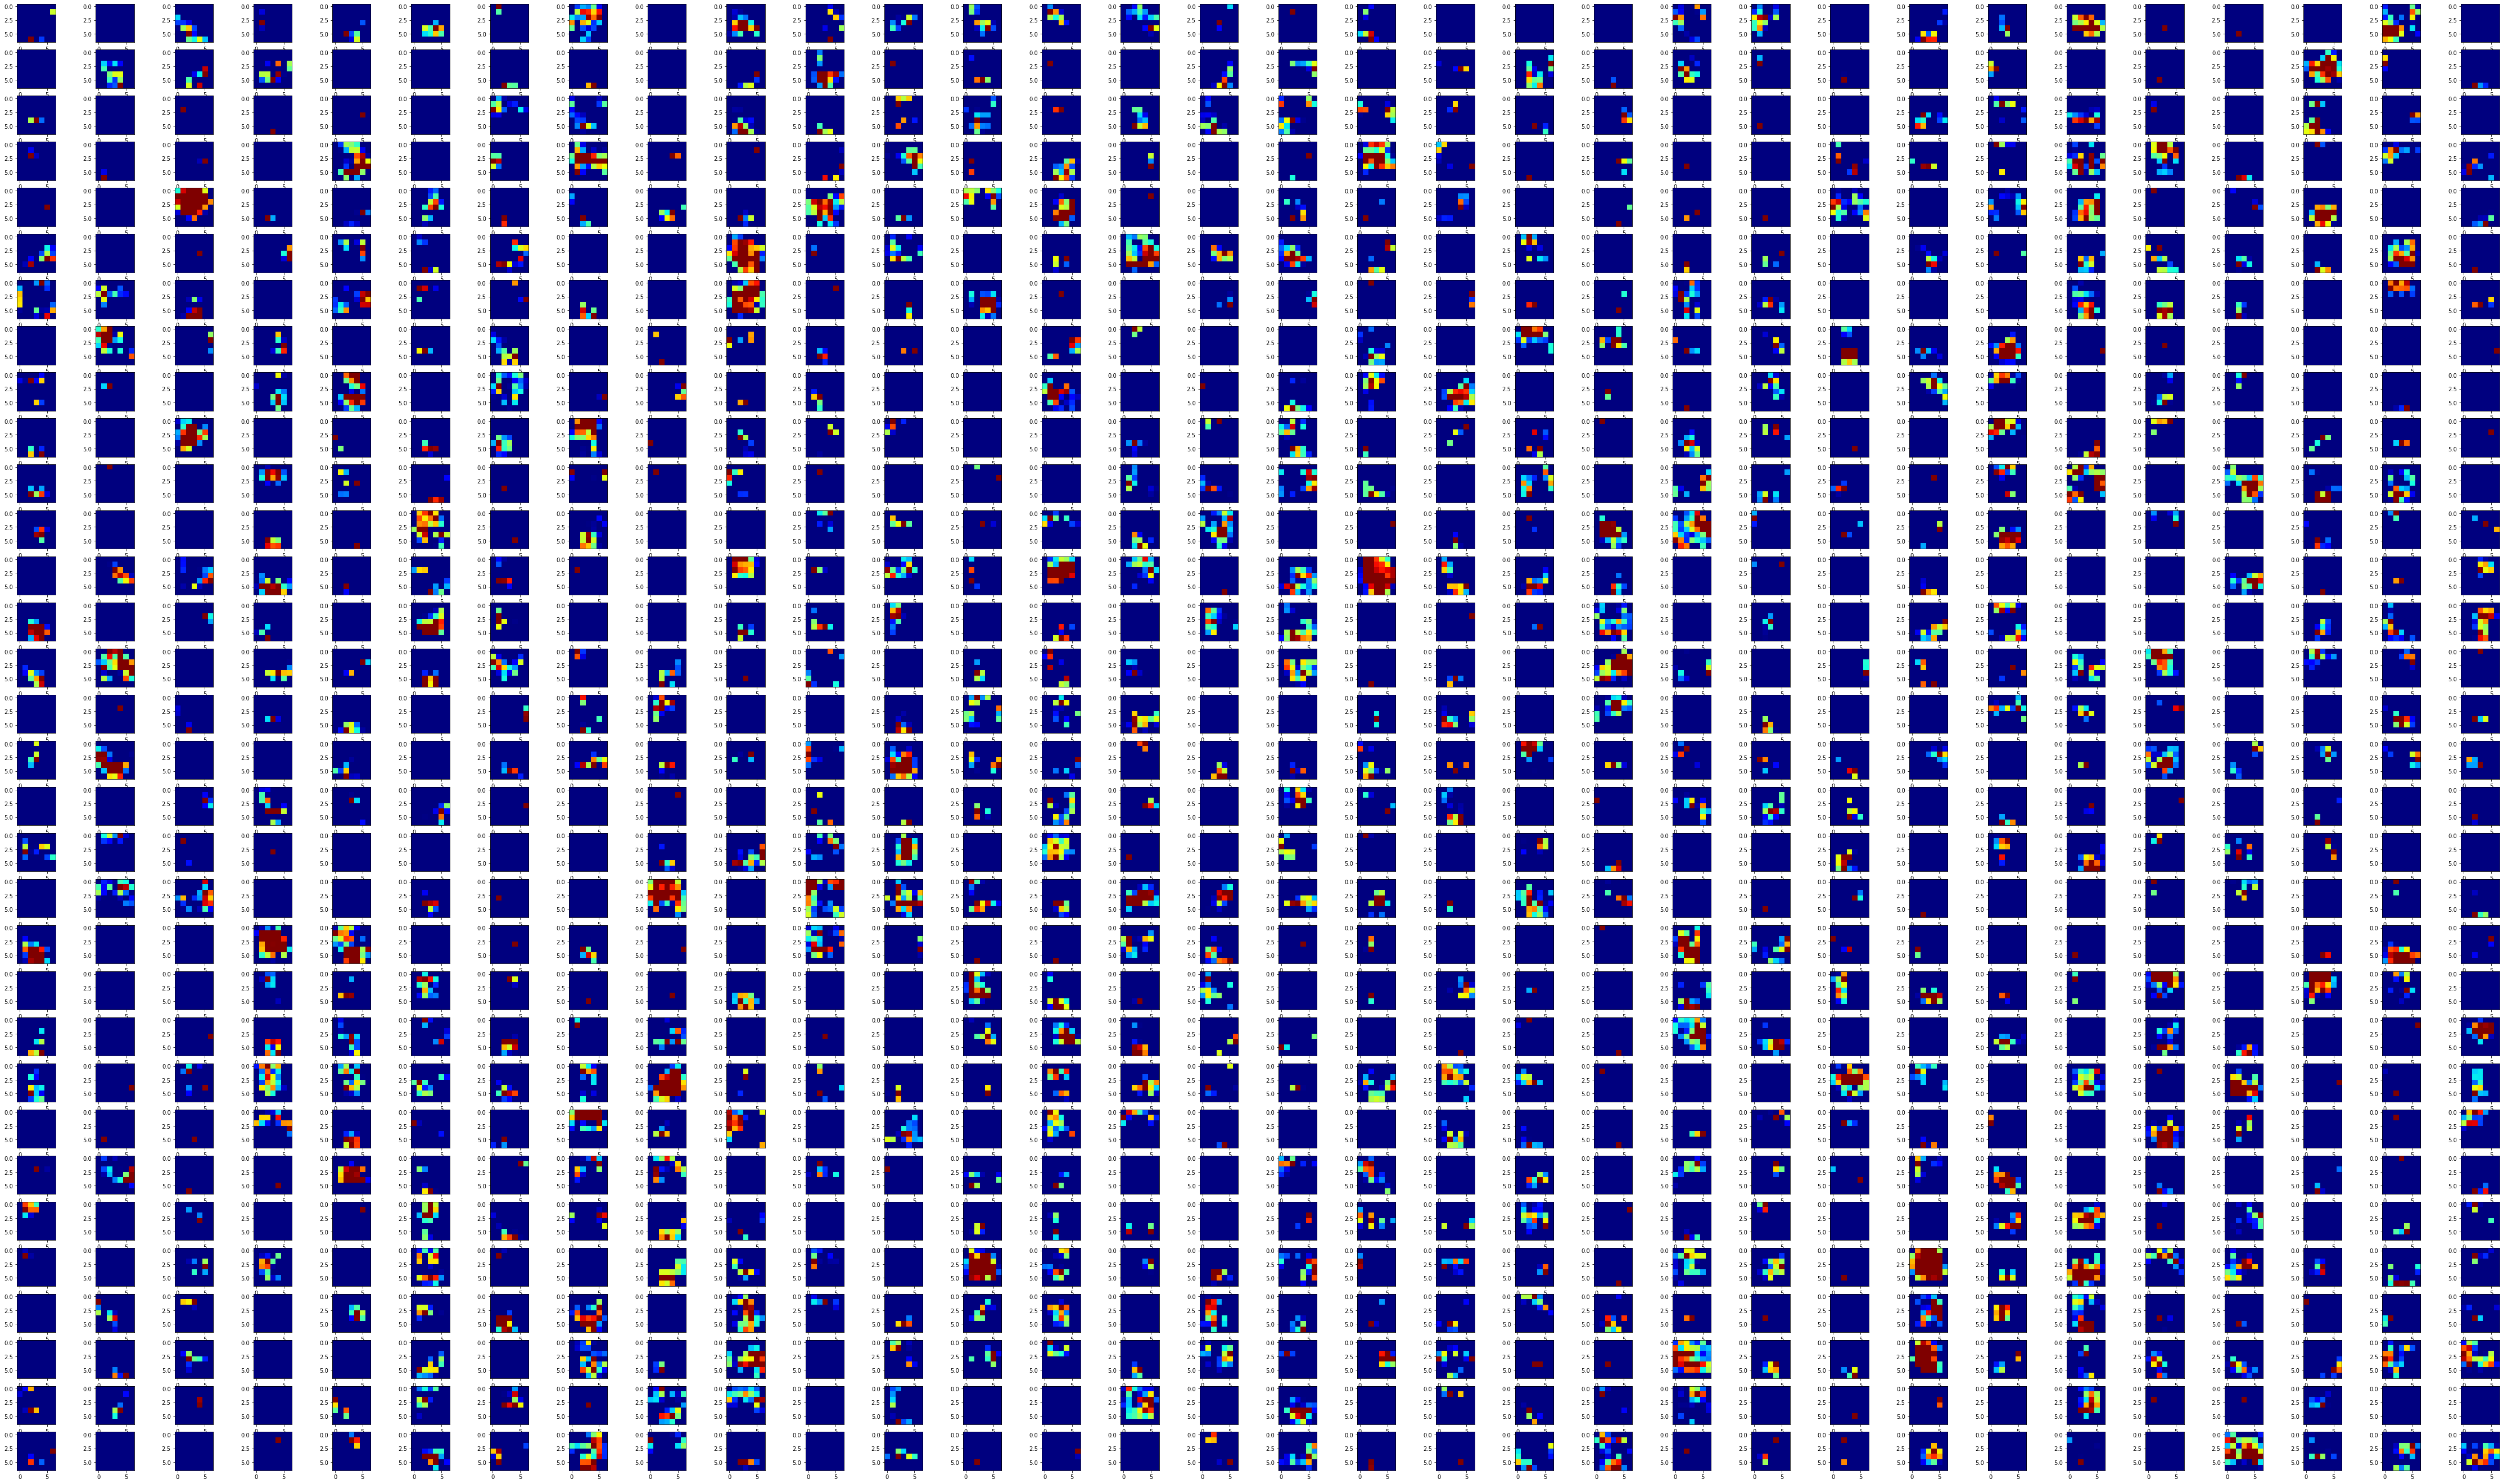

In [538]:
row_size=32
col_size=32
act_index = 4 # in last layer of chunked part of base model(that is layer 7 from top) --> conv_pw_1_relu (ReLU) (None, 112, 112, 64)  - total channels is 64 tht no of neurons is 64 so 8 * 8 = row* col = 64 - if increase more than this will get out of index erroe  
visualise_2D_output(activations, col_size, row_size, act_index)

## Starting Layer Neuron output visualisation for analysis

While visualising the starting layer neuron outputs we can say that the input image is more recognizable in starting compared to when it goes into deeper in neural network that is in the end layers. Also, we can say that colour at the location of the object is different than colour in rest of the region in some neuron while in other neurons single colour no patterns or change of the colour appeared.

In [566]:
layer_list = [layer.output for layer in model.layers[0:5]]
layer_name = [layer.name for layer in model.layers[0:5]]
start_layer_model = models.Model(inputs=model.input, outputs=layer_list)
layer_list

[<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, None, None, 32) dtype=float32 (created by layer 'conv1')>,
 <KerasTensor: shape=(None, None, None, 32) dtype=float32 (created by layer 'conv1_bn')>,
 <KerasTensor: shape=(None, None, None, 32) dtype=float32 (created by layer 'conv1_relu')>,
 <KerasTensor: shape=(None, None, None, 32) dtype=float32 (created by layer 'conv_dw_1')>]

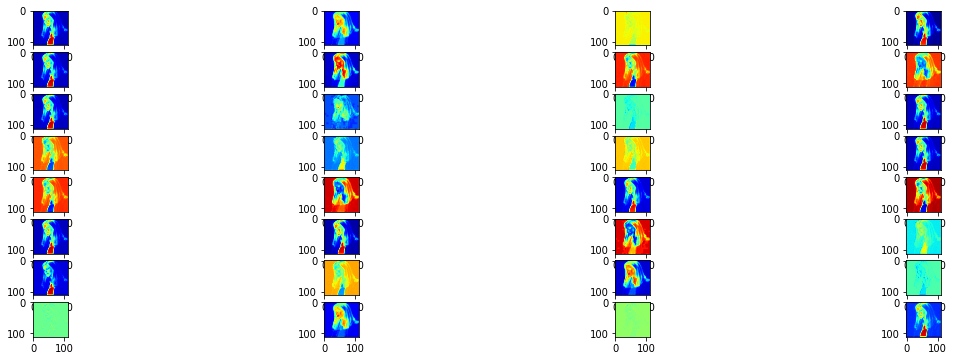

In [567]:
row_size=8
col_size=4
act_index = 1
activations = start_layer_model.predict(sample_image) 
visualise_2D_output(activations, col_size, row_size, act_index)

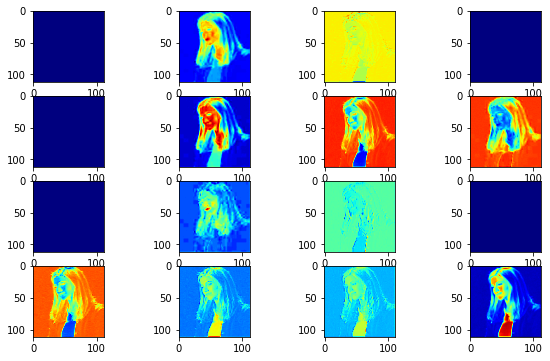

In [568]:
row_size=4
col_size=4
act_index = 2
activations = start_layer_model.predict(sample_image) 
visualise_2D_output(activations, col_size, row_size, act_index)

# HEATMAP : Grad-CAM class activation visualization


**The below code for visvualisation has been taken from Keras site of Computer Vision / Grad-CAM class activation visualization**
[15]https://keras.io/examples/vision/grad_cam/

In [569]:
activation_model.output

[<KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'conv_dw_13_bn')>,
 <KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'conv_dw_13_relu')>,
 <KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'conv_pw_13')>,
 <KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'conv_pw_13_bn')>,
 <KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'conv_pw_13_relu')>,
 <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_average_pooling2d')>]

In [578]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index): # [15]
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

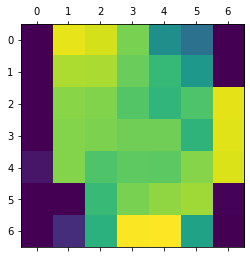

In [581]:
# preprocessed image : img_arr_dim_expand
# model : base model : base_model_part3
# last_conv_layer_name : last conv layer to display output
last_conv_layer_name = 'conv_pw_13_relu'
heat_model = base_model_part3
heat_model.layers[-1].activation = None # Remove last layer's softmax
heatmap = make_gradcam_heatmap(sample_image, heat_model, last_conv_layer_name,pred_index =None) # Generate class activation heatmap
plt.matshow(heatmap) # Display heatmap # ,cmap='jet'
plt.show()

In [574]:
def save_and_display_gradcam(img_path,heatmap, cam_path, alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


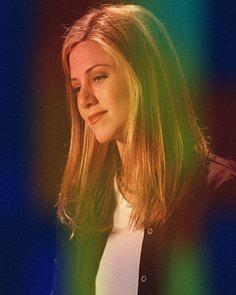

In [51]:
img_path = 'friends_tv_series_dataset/Classify/RG1.jpg'
cam_path =  'friends_tv_series_dataset/heatmap/cam.jpg'
save_and_display_gradcam(img_path,heatmap,cam_path)


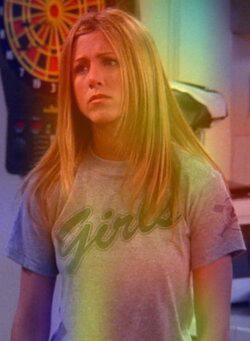

In [582]:
img_path = 'friends_tv_series_dataset/Classify/RG4.jpg'
cam_path =  'friends_tv_series_dataset/heatmap/cam.jpg'
save_and_display_gradcam(img_path,heatmap,cam_path)